In this notebook I am studying the LJ reconstruction efficiency w.r.t various parameters such as $Z_d$ $p_T$, $L_{xy}$ $\Delta$R(e, e) for a higher bound state mass. Here I am considering the dark photons decaying to electrons alone, because $Z_d \rightarrow ee$ and $Z_d \rightarrow \mu\mu$ behaves differently. Also the sample is least collimated with $Z_d$ mass = 5GeV. The avg lab frame decay length is 300 cm

In [1]:
# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays

# local
sys.path.insert(1, os.path.join(sys.path[0], '../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import hist
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples = [



    "2Mu2E_1000GeV_5GeV_40mm",
    #"2Mu2E_1000GeV_5GeV_20mm",

    #"2Mu2E_1000GeV_5GeV_40mm",

   # "2Mu2E_1000GeV_5GeV_4mm",

    

]

fileset = utilities.make_fileset(samples, "ffntuple_v4")



Here we are considering the following selections <br>
1) whole events <br>
2) $Z_d$ $L_{xy} < 150 cm$. <br>
3) $Z_d \rightarrow ee$ $L_{xy} < 40 cm$. <br>
4) $Z_d \rightarrow ee$ $100 <L_{xy} < 135 cm$. <br>
5) $Z_d \rightarrow ee$ $100 <L_{xy} < 135 cm$. <br> matched with LJ

In [3]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=2,
    )

p = sidm_processor.SidmProcessor(
    [
        "baseNoLj",
        "baseNoLj_lowLxyA",
        "baseNoLj_promptA_ee",
        "baseNoLj_veryDisplacedA_ee",
        "baseNoLj_veryDisplacedA_ee_matched_lj"
      

        
    ],
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

Output()

Output()

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA_ee

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA_ee

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA_ee_matched_lj

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA_ee

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA_ee

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA_ee_matched_lj

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA_ee

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA_ee

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA_ee_matched_lj

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA_ee

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA_ee

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA_ee_matched_lj

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA_ee

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA_ee

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA_ee_matched_lj

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA_ee

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA_ee

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA_ee_matched_lj

In [4]:
ch1= "baseNoLj"
ch2= "baseNoLj_lowLxyA"
ch3= "baseNoLj_promptA_ee"
ch4= "baseNoLj_veryDisplacedA_ee"
ch5= "baseNoLj_veryDisplacedA_ee_matched_lj"

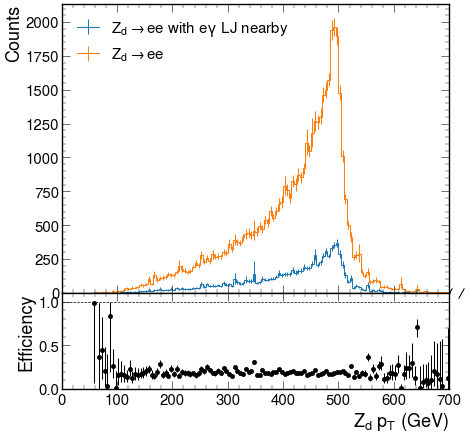

In [5]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_toE_matched_egmLj_pt_highRange"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genAs_toE_pt_highRange"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.savefig("../../../plots/Zd_ee_1000_5_pt_highrange.png", bbox_inches="tight")

The efficiency remains constant through out the entire range of $p_T$

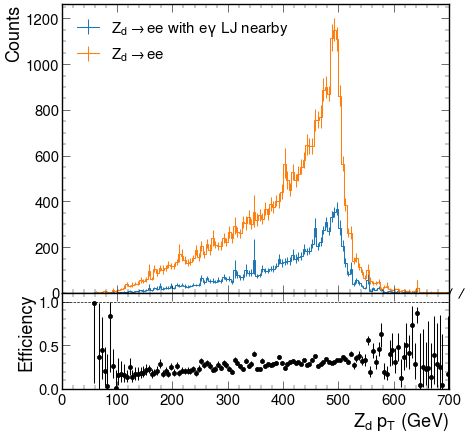

In [6]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_toE_matched_egmLj_pt_highRange"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genAs_toE_pt_highRange"][ch2,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.savefig("../../../plots/Zd_ee_1000_5_pt_highrange_lxy<150.png", bbox_inches="tight")

Efficiency increases as $p_T$ increases after the $L_{xy} < 150 cm$ cut applied.

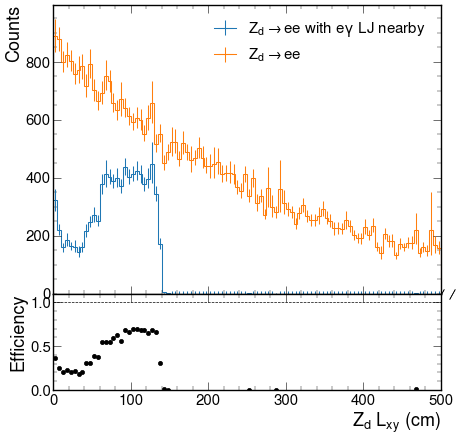

In [7]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genAs_toE_lxy"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.savefig("../../../plots/Zd_ee_1000_5_lxy.png", bbox_inches="tight")

Looking at the LJ reconstruction efficiency w.r.t $L_{xy}$ we see that, there are two regions in which efficiency doesn't change much. Those regions are $L_{xy} < 40$ and $100< L_{xy} <135$. We look at LJ reco efficiency w.r.t pT with those cuts applied

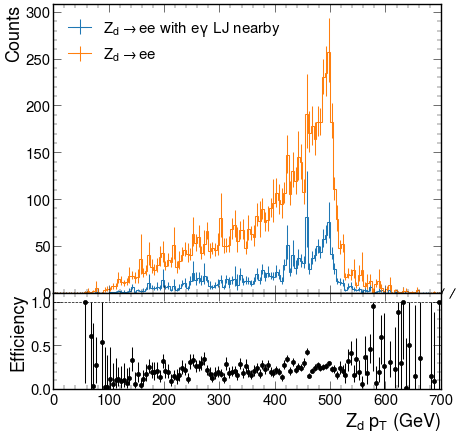

In [8]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_toE_matched_egmLj_pt_highRange"][ch3,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genAs_toE_pt_highRange"][ch3,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.savefig("../../../plots/Zd_ee_1000_5_pt_highrange_lxy<40.png", bbox_inches="tight")

We see that that for $L_{xy} < 40$, the efficiency is almost constant throughout the enitre range of pT

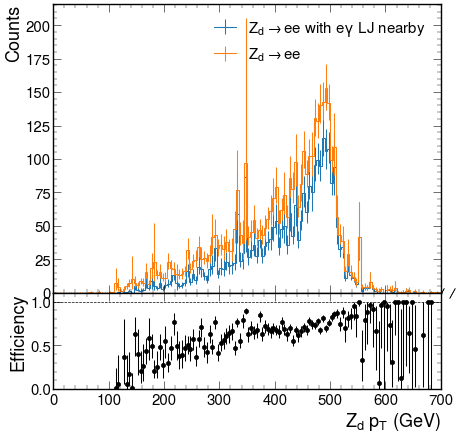

In [9]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_toE_matched_egmLj_pt_highRange"][ch4,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genAs_toE_pt_highRange"][ch4,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.savefig("../../../plots/Zd_ee_1000_5_pt_highrange_100<lxy<135.png", bbox_inches="tight")

But for the cut $100< L_{xy}< 135$ the efficicency increases as the Pt increases. That means something other than $L_{xy}$ is contributing to the efficiency here. Now look at the efficiency as a funtion of $\Delta$R between the electrons

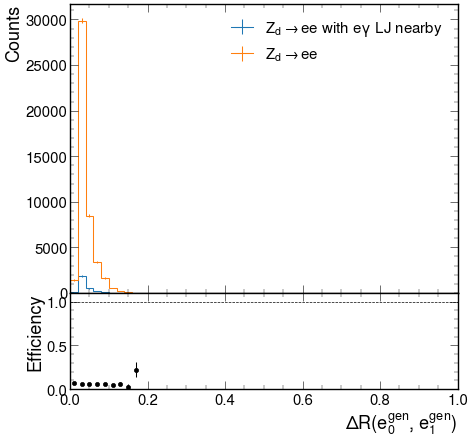

In [10]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genE_genE_dR"][ch5,:].plot_ratio(
       output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genE_genE_dR"][ch4,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )
plt.savefig("../../../plots/Zd_ee_1000_5_dR(e,e).png", bbox_inches="tight")

Here we see that the efficiency is not changing too much w.r.t $\Delta R$. That is also not a factor in the increase in efficiency as pT increases.

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f3406168ee0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f34065a30a0>, text=[])

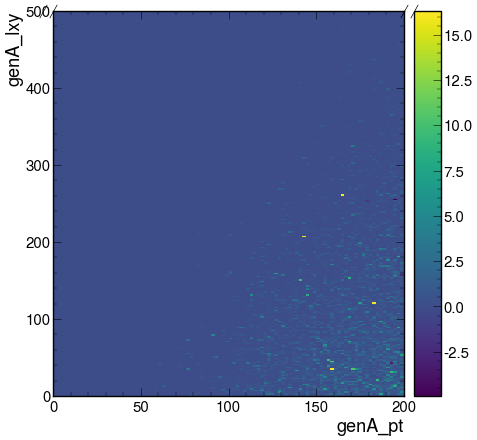

In [12]:
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_pt_lxy"][ch1,:, :].plot()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f33eeb283d0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f33eebd09d0>, text=[])

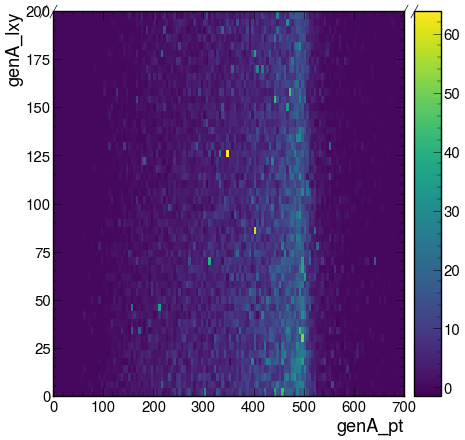

In [13]:
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genAs_toE_pt_lxy"][ch1,:, :].plot()

In [ ]:
output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_toE_matched_egmLj_pt_lxy"][ch1,:, :].plot()

In [15]:
values = output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_toE_matched_egmLj_pt_lxy"][ch1,:, :].values()\
          /(output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genAs_toE_pt_lxy"][ch1,:, :].values() + 0.00001)

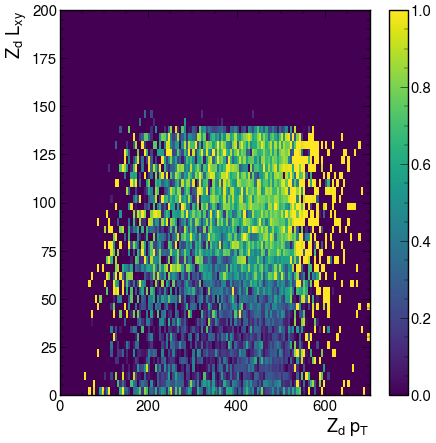

In [16]:
hist2d = output["out"]["2Mu2E_1000GeV_5GeV_40mm"]["hists"]["genA_toE_matched_egmLj_pt_lxy"][ch1,:, :]
#hist2d = hist.Hist(hist.axis.Regular(140, 0, 700), hist.axis.Regular(250, 0, 500))
fig, ax = plt.subplots()
#mesh = ax.pcolormesh(*hist2d.axes.edges.T, values.T)
mesh = ax.pcolormesh(*hist2d.axes.edges.T, values.T, vmin = 0.0 , vmax = 1.0)
ax.set_xlabel(r"$Z_d$ $p_T$")
ax.set_ylabel(r"$Z_d$ $L_{xy}$")
fig.colorbar(mesh)

